<a href="https://colab.research.google.com/github/BinaryCoder30/-Walmart-Weekly-Sales-Forecasting/blob/main/Project_ML_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("/content/train_data1.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,10,12-02-2010,2176028.52,1,49.96,2.828,126.496258,9.765
1,8,13-04-2012,909989.45,0,65.19,3.891,225.062571,5.679
2,5,16-04-2010,306858.69,0,65.30,2.808,211.038853,6.465
3,26,24-06-2011,997474.93,0,56.94,3.851,135.265267,7.818
4,11,31-08-2012,1372872.35,0,86.49,3.638,225.829306,6.334


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4504 entries, 0 to 4503
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         4504 non-null   int64  
 1   Date          4504 non-null   object 
 2   Weekly_Sales  4504 non-null   float64
 3   Holiday_Flag  4504 non-null   int64  
 4   Temperature   4504 non-null   float64
 5   Fuel_Price    4504 non-null   float64
 6   CPI           4504 non-null   float64
 7   Unemployment  4504 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 281.6+ KB


In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,4504.000000,4.504000e+03,4504.000000,4504.000000,4504.000000,4504.000000,4504.000000
mean,23.133881,1.035921e+06,0.068384,60.158490,3.348239,170.907458,7.971860
std,13.003888,5.671481e+05,0.252431,18.806719,0.503790,40.691203,1.934972
min,0.000000,0.000000e+00,0.000000,-2.060000,0.000000,0.000000,0.000000
25%,12.000000,5.461966e+05,0.000000,46.980000,2.931000,131.686000,6.891000
50%,23.000000,9.529307e+05,0.000000,62.390000,3.452000,182.693256,7.874000
75%,34.000000,1.410595e+06,0.000000,74.600000,3.735000,212.094543,8.622000
max,45.000000,3.749058e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
# Shape (rows, columns)
print("Shape:", df.shape)

# Column names
print("\nColumns:", df.columns.tolist())

# Data types
print("\nData types:")
print(df.dtypes)


Shape: (4504, 8)

Columns: ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

Data types:
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [ ]:
# Count missing value per column
df.isna().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
# Remove duplicates
df = df.drop_duplicates()

In [ ]:
# Before
print("Before:", df.shape)

# Remove duplicates
df = df.drop_duplicates()

# Remove rows with Weekly_Sales = 0
df = df[df['Weekly_Sales'] != 0]

# After
print("After:", df.shape)

Before: (4503, 8)
After: (4484, 8)


In [ ]:
# Find numeric columns
num_cols = df.select_dtypes(include='number').columns

# Count number of zeros per row
zero_count = (df[num_cols] == 0).sum(axis=1)

# Get rows having more than 2 zeros
bad_rows = df[zero_count > 2]

print("Rows with >2 zero values:", bad_rows.shape[0])
bad_rows


Rows with >2 zero values: 4


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
150,25,08-10-2010,674283.86,0,0.00,0.000,0.00000,0.000
168,27,27-05-2011,1820723.17,0,0.00,4.134,0.00000,0.000
909,2,0,1957113.89,0,81.13,0.000,210.55523,0.000
1564,7,0,694150.89,0,0.00,0.000,0.00000,7.872


In [ ]:
df = df[zero_count <= 2]

In [ ]:
# Remove rows with Store = 0
df = df[df['Store'] != 0]

# Remove rows with Fuel_Price = 0
df = df[df['Fuel_Price'] != 0]

print("Remaining rows:", df.shape)


Remaining rows: (4478, 8)


In [ ]:
(num_cols := df.select_dtypes(include='number').columns)
(df[num_cols] == 0).sum()

,0
Store,0
Weekly_Sales,0
Holiday_Flag,4173
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y", errors='coerce')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,10,2010-02-12,2176028.52,1,49.96,2.828,126.496258,9.765
1,8,2012-04-13,909989.45,0,65.19,3.891,225.062571,5.679
2,5,2010-04-16,306858.69,0,65.30,2.808,211.038853,6.465
3,26,2011-06-24,997474.93,0,56.94,3.851,135.265267,7.818
4,11,2012-08-31,1372872.35,0,86.49,3.638,225.829306,6.334


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4478 entries, 0 to 4503
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         4478 non-null   int64         
 1   Date          4477 non-null   datetime64[ns]
 2   Weekly_Sales  4478 non-null   float64       
 3   Holiday_Flag  4478 non-null   int64         
 4   Temperature   4478 non-null   float64       
 5   Fuel_Price    4478 non-null   float64       
 6   CPI           4478 non-null   float64       
 7   Unemployment  4478 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 314.9 KB


In [ ]:
df['Day']   = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year

In [ ]:
df.isna().sum()


,0
Store,0
Date,1
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0
Day,1
Month,1


In [ ]:
df.dropna(subset=["Day", "Month", "Year"], inplace=True)

In [ ]:
df.drop(columns=['Date'], inplace=True)

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'Weekly_Sales'}>,
        <Axes: title={'center': 'Holiday_Flag'}>],
       [<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Fuel_Price'}>,
        <Axes: title={'center': 'CPI'}>],
       [<Axes: title={'center': 'Unemployment'}>,
        <Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'Year'}>, <Axes: >, <Axes: >]],
      dtype=object)

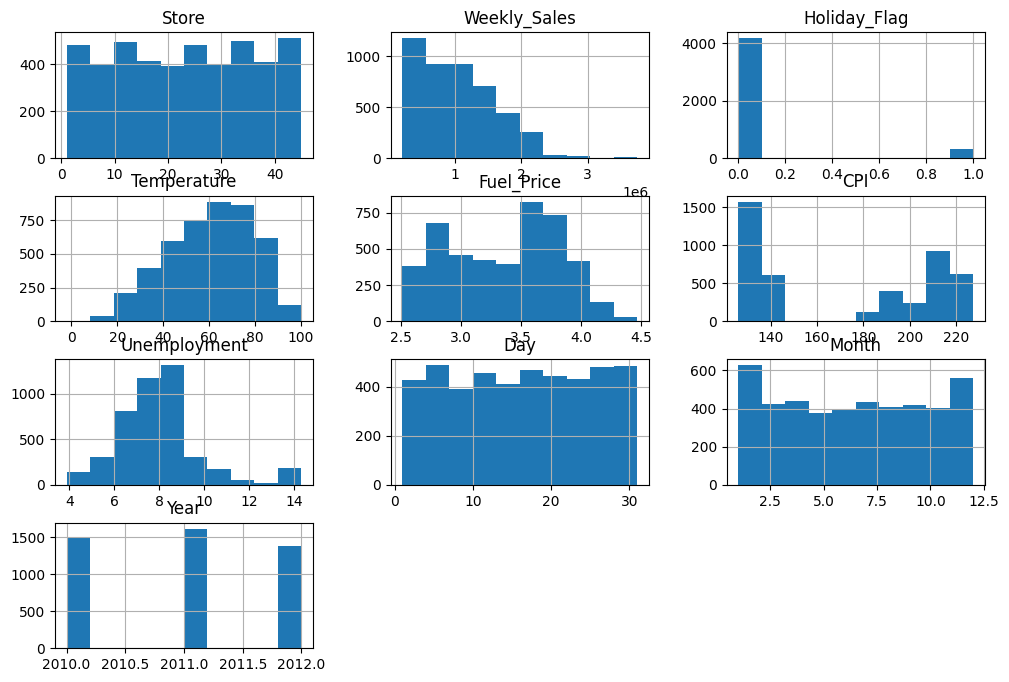

In [ ]:
df.hist(figsize=(12,8))


In [ ]:
# Calculate IQR bounds for Temperature
Q1  = df['Temperature'].quantile(0.25)
Q3  = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Remove Temperature outlier row(s)
df = df[(df['Temperature'] >= lower) & (df['Temperature'] <= upper)]

print("Remaining rows:", df.shape)


Remaining rows: (4476, 10)


In [ ]:
(df["Weekly_Sales"] == 0).sum()


np.int64(0)

In [ ]:
import numpy as np

df["Weekly_Sales_Log"] = np.log(df["Weekly_Sales"])

In [ ]:
df = pd.get_dummies(df, columns=["Store"], prefix="Store")

In [ ]:
df["Weekly_Sales_Log"]

,Weekly_Sales_Log
0,14.593012
1,13.721188
2,12.634143
3,13.812982
4,14.132416
...,...
4499,14.351633
4500,13.138656
4501,13.143709
4502,12.744515


In [ ]:
X = df.drop(columns=["Weekly_Sales", "Weekly_Sales_Log"])
y = df["Weekly_Sales_Log"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False  # time series
)


In [ ]:
# !pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    "depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.02, 0.03, 0.05],
    "iterations": [500, 700, 900, 1200],
    "l2_leaf_reg": [1, 3, 5, 7, 9],
    "bagging_temperature": [0, 0.5, 1, 2, 5],
    "border_count": [32, 64, 128, 254]
}


In [ ]:
cat_model = CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=False
)


In [ ]:
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    n_iter=75,                     # improved
    cv=5,                          # more stable
    scoring="neg_mean_absolute_error",  # smoother performance metric
    verbose=1,
    n_jobs=-1,
    random_state=42
)


In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7dc5a713ff50>,
                   n_iter=75, n_jobs=-1,
                   param_distributions={'bagging_temperature': [0, 0.5, 1, 2,
                                                                5],
                                        'border_count': [32, 64, 128, 254],
                                        'depth': [4, 6, 8, 10],
                                        'iterations': [500, 700, 900, 1200],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.05]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=1)

In [ ]:
print("Best Parameters:", random_search.best_params_)
print("Best RMSE (CV):", np.sqrt(-random_search.best_score_))


Best Parameters: {'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 1200, 'depth': 8, 'border_count': 254, 'bagging_temperature': 0.5}
Best RMSE (CV): 0.20194020702814242


In [ ]:
best_params = random_search.best_params_

cat_best = CatBoostRegressor(
    **best_params,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=False
)

cat_best.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# ===================================
# 🔹 TRAIN PERFORMANCE
# ===================================
y_train_pred_log = cat_best.predict(X_train)

# Convert log → real
y_train_pred = np.exp(y_train_pred_log)
y_train_actual = np.exp(y_train)

train_r2  = r2_score(y_train_actual, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train_actual, y_train_pred))
train_mae  = mean_absolute_error(y_train_actual, y_train_pred)

print("====== TRAIN PERFORMANCE ======")
print("Train R²  :", train_r2)
print("Train RMSE:", train_rmse)
print("Train MAE :", train_mae)


# ===================================
# 🔹 TEST PERFORMANCE
# ===================================
y_test_pred_log = cat_best.predict(X_test)

# Convert log → real
y_test_pred = np.exp(y_test_pred_log)
y_test_actual = np.exp(y_test)

test_r2  = r2_score(y_test_actual, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_pred))
test_mae  = mean_absolute_error(y_test_actual, y_test_pred)

print("\n====== TEST PERFORMANCE ======")
print("Test R²  :", test_r2)
print("Test RMSE:", test_rmse)
print("Test MAE :", test_mae)


====== TRAIN PERFORMANCE ======
Train R²  : 0.9979068004425273
Train RMSE: 25739.431621462743
Train MAE : 17536.69198525186

====== TEST PERFORMANCE ======
Test R²  : 0.9914995426609574
Test RMSE: 52537.65787957977
Test MAE : 34582.669851425824


============================================================================


Testing the Model on unseen data


In [ ]:
import pandas as pd
import numpy as np

df_test = pd.read_csv("/content/wall_test_data.csv")

In [ ]:
df_test["Date"] = pd.to_datetime(df_test["Date"], format="%d-%m-%Y", errors='coerce')
df_test = df_test.dropna(subset=["Date"])

df_test["Day"] = df_test["Date"].dt.day
df_test["Month"] = df_test["Date"].dt.month
df_test["Year"] = df_test["Date"].dt.year


In [ ]:
df_test.shape

(1931, 11)

In [ ]:
df_test["Weekly_Sales_Log"] = np.log(df_test["Weekly_Sales"])

In [ ]:
import pandas as pd

cols_to_check = ["Temperature", "CPI", "Fuel_Price"]

outlier_summary = {}

for col in cols_to_check:
    Q1 = df_test[col].quantile(0.25)
    Q3 = df_test[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df_test[(df_test[col] < lower_bound) | (df_test[col] > upper_bound)]

    outlier_summary[col] = len(outliers)

    print(f"\n===== {col} Outliers =====")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Outlier Count: {len(outliers)}")
    print(outliers[[col]].head())  # show sample rows



===== Temperature Outliers =====
Lower Bound: 6.230000000000004
Upper Bound: 117.35000000000001
Outlier Count: 1
     Temperature
429         5.54

===== CPI Outliers =====
Lower Bound: 8.553810149999961
Upper Bound: 336.48472495000004
Outlier Count: 0
Empty DataFrame
Columns: [CPI]
Index: []

===== Fuel_Price Outliers =====
Lower Bound: 1.7137499999999994
Upper Bound: 4.93975
Outlier Count: 0
Empty DataFrame
Columns: [Fuel_Price]
Index: []


In [ ]:
df_test = pd.get_dummies(df_test, columns=["Store"], prefix="Store")

In [ ]:
df_test.drop(columns=['Date'], inplace=True)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1931 entries, 0 to 1930
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Weekly_Sales      1931 non-null   float64
 1   Holiday_Flag      1931 non-null   int64  
 2   Temperature       1931 non-null   float64
 3   Fuel_Price        1931 non-null   float64
 4   CPI               1931 non-null   float64
 5   Unemployment      1931 non-null   float64
 6   Day               1931 non-null   int32  
 7   Month             1931 non-null   int32  
 8   Year              1931 non-null   int32  
 9   Weekly_Sales_Log  1931 non-null   float64
 10  Store_1           1931 non-null   bool   
 11  Store_2           1931 non-null   bool   
 12  Store_3           1931 non-null   bool   
 13  Store_4           1931 non-null   bool   
 14  Store_5           1931 non-null   bool   
 15  Store_6           1931 non-null   bool   
 16  Store_7           1931 non-null   bool   


In [ ]:
# Create X_test and y_test
X_test = df_test.drop(columns=["Weekly_Sales", "Weekly_Sales_Log"])
y_test = df_test["Weekly_Sales_Log"]

# Align with training feature columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
y_test_pred_log = cat_best.predict(X_test)

In [ ]:
y_test_pred = np.exp(y_test_pred_log)
y_test_actual = np.exp(y_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

test_r2  = r2_score(y_test_actual, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_pred))
test_mae  = mean_absolute_error(y_test_actual, y_test_pred)
test_mse  = mean_squared_error(y_test_actual, y_test_pred)

print("===== TEST PERFORMANCE =====")
print("Test R²  :", test_r2)
print("Test RMSE:", test_rmse)
print("Test MAE :", test_mae)
print("Test MSE :", test_mse)


===== TEST PERFORMANCE =====
Test R²  : 0.9886354854412017
Test RMSE: 60278.27049157696
Test MAE : 37256.36050464499
Test MSE : 3633469893.4557176


In [ ]:
df_test.describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Weekly_Sales_Log
count,1.931000e+03,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000,1931.000000
mean,1.060167e+06,0.073019,61.248571,3.352159,171.361191,7.988513,15.467115,6.472812,2010.938892,13.713651
std,5.655849e+05,0.260235,18.463077,0.461965,39.679493,1.873612,8.699016,3.220508,0.792709,0.593911
min,2.135383e+05,0.000000,5.540000,2.472000,126.064000,4.077000,1.000000,1.000000,2010.000000,12.271572
25%,5.579893e+05,0.000000,47.900000,2.923500,131.527903,6.907000,8.000000,4.000000,2010.000000,13.232095
50%,9.798487e+05,0.000000,63.260000,3.424000,181.865754,7.866000,16.000000,6.000000,2011.000000,13.795153
75%,1.436912e+06,0.000000,75.680000,3.730000,213.510632,8.567000,23.000000,9.000000,2012.000000,14.178007
max,3.818686e+06,1.000000,100.070000,4.468000,227.018417,14.313000,31.000000,12.000000,2012.000000,15.155417


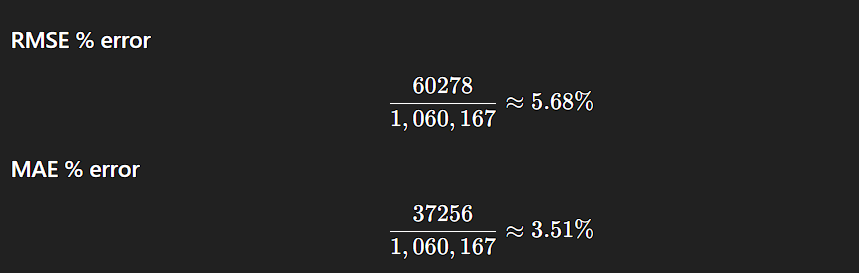